# COMP3009 Assignment: Huzaifa Khan 20188850

### Import Necessary packages

In [122]:
import pandas as pd
import numpy as np
#!pip install plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle as pk1
#!pip install arff
import arff
from scipy.io import arff
from scipy.spatial import distance
from numpy import linalg as LA
#!pip install mlxtend
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

## Data preperation 

### Read Data into the Notebook

In [123]:
trainData = pd.read_csv("Assignment_2023_training_set_final.csv")
testDataFinal = pd.read_csv("Assignment_2023_test_set_final.csv")
traindf = pd.DataFrame(trainData)
testdf = pd.DataFrame(testDataFinal)

In [124]:
trainData.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [125]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### Show number of attributes and instances

In [126]:
print("Number of Instances = ", trainData.shape[0])
print("Number of Attributes = ", trainData.shape[1])

Number of Instances =  82332
Number of Attributes =  45


### Show Attribute Statistics - Numeric

In [127]:
trainData.describe(include=[np.number])

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


### Show Attribute Statistics - Nominal

In [128]:
trainData.describe(include=[object])

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


### Drop duplicate values if any

In [129]:
trainData = trainData.dropna()
trainData = trainData.drop_duplicates()

### Determining numeric attributes that should be categrocial

In [130]:
for col in trainData.select_dtypes(include=np.number):
    if trainData[col].nunique() < 6:
        print(col)
        trainData[col] = trainData[col].astype(object)  

is_ftp_login
ct_ftp_cmd
is_sm_ips_ports
label


### Change to Categorical

In [131]:
trainData['is_ftp_login'] = trainData["is_ftp_login"].astype('category')
trainData['ct_ftp_cmd'] = trainData["ct_ftp_cmd"].astype('category')
trainData['is_sm_ips_ports'] = trainData["is_sm_ips_ports"].astype('category')
trainData['label'] = trainData["label"].astype('category')

### Determinng object attributes that should be categorical

In [132]:
for col in trainData.select_dtypes(include=object):
    print(col)
    trainData[col] = trainData[col].astype(object)

proto
service
state
attack_cat


### Change to Categorical

In [133]:
trainData['proto'] = trainData["proto"].astype('category')
trainData['service'] = trainData["service"].astype('category')
trainData['state'] = trainData["state"].astype('category')
trainData['attack_cat'] = trainData["attack_cat"].astype('category')

In [134]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 82332 non-null  int64   
 1   dur                82332 non-null  float64 
 2   proto              82332 non-null  category
 3   service            82332 non-null  category
 4   state              82332 non-null  category
 5   spkts              82332 non-null  int64   
 6   dpkts              82332 non-null  int64   
 7   sbytes             82332 non-null  int64   
 8   dbytes             82332 non-null  int64   
 9   rate               82332 non-null  float64 
 10  sttl               82332 non-null  int64   
 11  dttl               82332 non-null  int64   
 12  sload              82332 non-null  float64 
 13  dload              82332 non-null  float64 
 14  sloss              82332 non-null  int64   
 15  dloss              82332 non-null  int64   
 16  sinp

In [135]:
trainData.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


### Removing invaluable/unnecessary columns

In [136]:
trainData = trainData.drop(columns=['id', 'proto','service','state','label'])

In [137]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float64 
 1   spkts              82332 non-null  int64   
 2   dpkts              82332 non-null  int64   
 3   sbytes             82332 non-null  int64   
 4   dbytes             82332 non-null  int64   
 5   rate               82332 non-null  float64 
 6   sttl               82332 non-null  int64   
 7   dttl               82332 non-null  int64   
 8   sload              82332 non-null  float64 
 9   dload              82332 non-null  float64 
 10  sloss              82332 non-null  int64   
 11  dloss              82332 non-null  int64   
 12  sinpkt             82332 non-null  float64 
 13  dinpkt             82332 non-null  float64 
 14  sjit               82332 non-null  float64 
 15  djit               82332 non-null  float64 
 16  swin

### Standardisation 

In [138]:
trainData_numeric = trainData.select_dtypes(include='number')
scaled_trainData_numeric = StandardScaler().fit_transform(trainData_numeric)
trainData[trainData_numeric.columns] = scaled_trainData_numeric

### Normalisation

In [139]:
scaled_trainData_numeric = MinMaxScaler().fit_transform(trainData_numeric)
trainData[trainData_numeric.columns] = scaled_trainData_numeric

### Shuffle rows making sure index also reset

In [140]:
trainData.sample(frac=1).reset_index(drop=True)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1.623107e-02,0.000845,0.000726,0.000036,0.000024,0.000017,0.996078,0.996047,7.500513e-07,0.000122,...,0.017241,0.027027,0.016129,0,0,0.0,0.033898,0.016393,0,Normal
1,1.107429e-02,0.000658,0.000726,0.000024,0.000034,0.000023,0.243137,0.996047,7.290679e-07,0.000250,...,0.000000,0.000000,0.016129,0,0,0.0,0.016949,0.000000,0,Exploits
2,5.997084e-03,0.001221,0.000726,0.000337,0.000178,0.000058,0.996078,0.996047,1.908040e-05,0.002431,...,0.000000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0,Exploits
3,2.133420e-02,0.000845,0.000726,0.000142,0.000157,0.000013,0.996078,0.996047,2.204257e-06,0.000603,...,0.000000,0.000000,0.000000,0,0,0.0,0.050847,0.000000,0,Exploits
4,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,1.666667e-07,0.000094,0.000000,0.000006,0.000000,0.100000,0.996078,0.000000,8.656036e-03,0.000000,...,0.051724,0.081081,0.048387,0,0,0.0,0.067797,0.147541,0,Generic
82328,1.666667e-07,0.000094,0.000000,0.000006,0.000000,0.100000,0.996078,0.000000,8.656036e-03,0.000000,...,0.034483,0.054054,0.032258,0,0,0.0,0.033898,0.131148,0,Generic
82329,3.739217e-03,0.001221,0.000545,0.000620,0.000022,0.000085,0.121569,0.114625,5.612020e-05,0.000457,...,0.000000,0.000000,0.016129,0,0,0.0,0.135593,0.032787,0,Normal
82330,1.663334e-05,0.000094,0.000182,0.000008,0.000012,0.003006,0.121569,0.114625,1.110802e-04,0.034265,...,0.000000,0.000000,0.000000,0,0,0.0,0.016949,0.016393,0,Normal


## Data Classification and Analysis

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from scipy.io import arff

## Analysis

### Splitting Test and Training Data

In [142]:
trainData, testData = train_test_split(trainData, test_size = 0.15, stratify = trainData["attack_cat"], random_state = 21)

trainData["attack_cat"].value_counts()

Normal            31450
Generic           16040
Exploits           9462
Fuzzers            5153
DoS                3476
Reconnaissance     2972
Analysis            575
Backdoor            496
Shellcode           321
Worms                37
Name: attack_cat, dtype: int64

### Oversampling

In [143]:
Y_train = trainData["attack_cat"]
X_train = trainData.drop("attack_cat",axis=1)
Y_test = testData["attack_cat"]
X_test = testData.drop("attack_cat",axis=1)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69982 entries, 68857 to 47863
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                69982 non-null  float64 
 1   spkts              69982 non-null  float64 
 2   dpkts              69982 non-null  float64 
 3   sbytes             69982 non-null  float64 
 4   dbytes             69982 non-null  float64 
 5   rate               69982 non-null  float64 
 6   sttl               69982 non-null  float64 
 7   dttl               69982 non-null  float64 
 8   sload              69982 non-null  float64 
 9   dload              69982 non-null  float64 
 10  sloss              69982 non-null  float64 
 11  dloss              69982 non-null  float64 
 12  sinpkt             69982 non-null  float64 
 13  dinpkt             69982 non-null  float64 
 14  sjit               69982 non-null  float64 
 15  djit               69982 non-null  float64 
 16  

### Hot Coding

In [144]:
to_rem = []
num_cols = []
cat_cols = []

In [145]:
trainDataEnc = OneHotEncoder().fit(trainData[cat_cols].astype(str))
trainData = trainData.reset_index(drop=True)
trainData = trainData.drop(cat_cols,axis=1).join(pd.DataFrame(trainDataEnc.transform(trainData[cat_cols].astype(str)).toarray()))

In [146]:
## Checking Attack Cat
trainData["attack_cat"].value_counts()

Normal            31450
Generic           16040
Exploits           9462
Fuzzers            5153
DoS                3476
Reconnaissance     2972
Analysis            575
Backdoor            496
Shellcode           321
Worms                37
Name: attack_cat, dtype: int64

### k-Nearest Neighbours Classifier

In [147]:
kNeighbour = KNeighborsClassifier(n_neighbors=10)
kNeighbour.fit(X_train, Y_train)
predict_k = kNeighbour.predict(X_test)
accuracyk = accuracy_score(Y_test,predict_k)
print("error-rate: {:.1f}%".format((1-accuracyk)*100))
print("accuracy: {:.1f}%".format((accuracyk)*100))
print('Predictions:\n',(predict_k, Y_test))

error-rate: 18.7%
accuracy: 81.3%
Predictions:
 (array(['Normal', 'Normal', 'Generic', ..., 'Normal', 'Exploits', 'DoS'],
      dtype=object), 27510            Normal
3738            Fuzzers
49440           Generic
4020     Reconnaissance
82181            Normal
              ...      
17618           Generic
32521            Normal
39096            Normal
44180          Exploits
555            Exploits
Name: attack_cat, Length: 12350, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms'])


In [148]:
print(classification_report(predict_k, Y_test))

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00        16
      Backdoor       0.00      0.00      0.00         7
           DoS       0.45      0.40      0.42       676
      Exploits       0.61      0.62      0.62      1629
       Fuzzers       0.40      0.56      0.47       643
       Generic       0.97      0.99      0.98      2777
        Normal       0.97      0.87      0.92      6196
Reconnaissance       0.51      0.67      0.58       395
     Shellcode       0.09      0.45      0.15        11
         Worms       0.00      0.00      0.00         0

      accuracy                           0.81     12350
     macro avg       0.40      0.46      0.41     12350
  weighted avg       0.85      0.81      0.83     12350



/Users/hfkhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hfkhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hfkhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


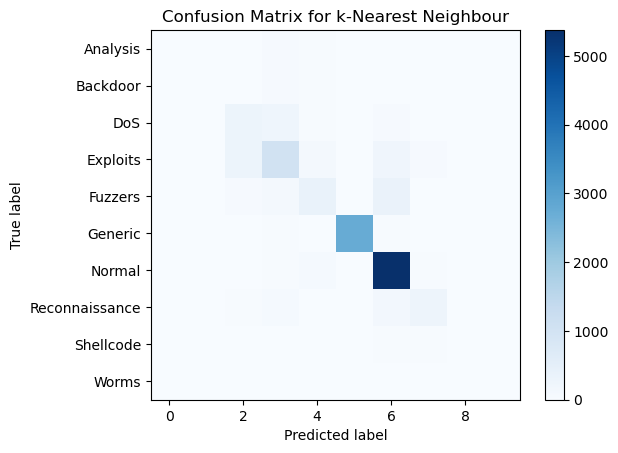

In [149]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
cmK = confusion_matrix(Y_test, predict_k)

# Plot confusion matrix
plt.imshow(cmK, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for k-Nearest Neighbour')
plt.colorbar()
classes = kNeighbour.classes_
tick_marksK = np.arange(len(classes))
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Decision Tree

In [150]:
treeClassifier = DecisionTreeClassifier(random_state=50)
treeClassifier.fit(X_train, Y_train)
predict_tree = treeClassifier.predict(X_test)
accuracyTree = accuracy_score(Y_test, predict_tree)
print("error-rate: {:.1f}%".format((1-accuracyTree)*100))
print("accuracy: {:.1f}%".format((accuracyTree)*100))
print((Y_test, predict_tree))

error-rate: 14.6%
accuracy: 85.4%
(27510            Normal
3738            Fuzzers
49440           Generic
4020     Reconnaissance
82181            Normal
              ...      
17618           Generic
32521            Normal
39096            Normal
44180          Exploits
555            Exploits
Name: attack_cat, Length: 12350, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], array(['Normal', 'Fuzzers', 'Generic', ..., 'Normal', 'Reconnaissance',
       'Exploits'], dtype=object))


In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(predict_tree, Y_test))

                precision    recall  f1-score   support

      Analysis       0.08      0.35      0.13        23
      Backdoor       0.01      0.06      0.02        16
           DoS       0.52      0.39      0.45       813
      Exploits       0.64      0.63      0.63      1694
       Fuzzers       0.64      0.67      0.66       873
       Generic       0.98      0.98      0.98      2820
        Normal       0.97      0.96      0.97      5556
Reconnaissance       0.79      0.87      0.83       479
     Shellcode       0.42      0.37      0.39        65
         Worms       0.00      0.00      0.00        11

      accuracy                           0.85     12350
     macro avg       0.51      0.53      0.51     12350
  weighted avg       0.86      0.85      0.86     12350



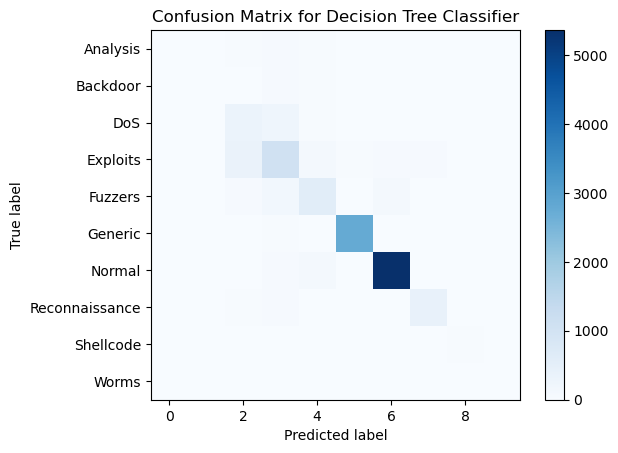

In [152]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
cmTree = confusion_matrix(Y_test, predict_tree)

# Plot confusion matrix
plt.imshow(cmTree, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.colorbar()
classesTree = treeClassifier.classes_
tick_marksTree = np.arange(len(classes))
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

NBayes = GaussianNB()
NBayes.fit(X_train, Y_train)
predict_bayes = NBayes.predict(X_test)
accuracyBayes = accuracy_score(Y_test, predict_bayes)
print("error-rate: {:.1f}%".format((1-accuracyBayes)*100))
print("accuracy: {:.1f}%".format((accuracyBayes)*100))
print((Y_test, predict_bayes))

error-rate: 65.6%
accuracy: 34.4%
(27510            Normal
3738            Fuzzers
49440           Generic
4020     Reconnaissance
82181            Normal
              ...      
17618           Generic
32521            Normal
39096            Normal
44180          Exploits
555            Exploits
Name: attack_cat, Length: 12350, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], array(['Exploits', 'Fuzzers', 'Backdoor', ..., 'Exploits',
       'Reconnaissance', 'Worms'], dtype='<U14'))


In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(predict_bayes, Y_test))

                precision    recall  f1-score   support

      Analysis       0.79      0.07      0.14      1097
      Backdoor       0.02      0.00      0.00      1663
           DoS       0.01      0.04      0.02       215
      Exploits       0.44      0.33      0.37      2231
       Fuzzers       0.15      0.25      0.18       531
       Generic       0.56      0.91      0.70      1738
        Normal       0.29      0.99      0.45      1621
Reconnaissance       0.09      0.07      0.08       721
     Shellcode       1.00      0.02      0.05      2328
         Worms       0.43      0.01      0.03       205

      accuracy                           0.34     12350
     macro avg       0.38      0.27      0.20     12350
  weighted avg       0.48      0.34      0.26     12350



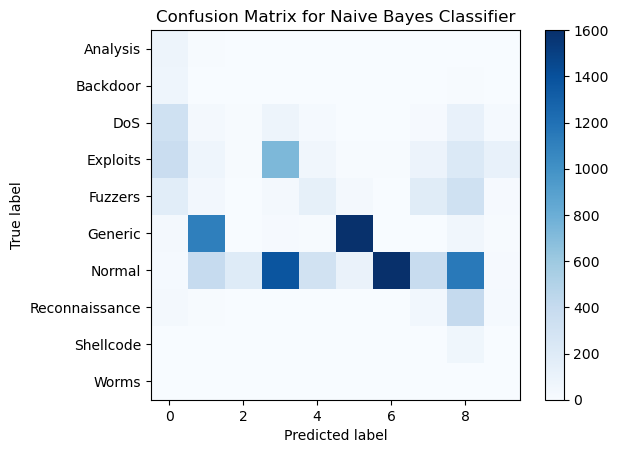

In [155]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
cmBayes = confusion_matrix(Y_test, predict_bayes)

# Plot confusion matrix
plt.imshow(cmBayes, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.colorbar()
classesBayes = NBayes.classes_
tick_marksBayes = np.arange(len(classes))
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Comparison of Model Performance -  Cross Validation

#### k-Fold Cross Validation for k-Neighbours Classifier

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

X_train = pd.DataFrame(X_train)
Y_train = pd.Series(Y_train)

skf = StratifiedKFold(n_splits=10)

kNeighbour = KNeighborsClassifier(n_neighbors=5)
for trainData, validate in skf.split(X_train, Y_train):
    kNeighbour.fit(X_train.iloc[trainData], Y_train.iloc[trainData])
    predict_validateK = kNeighbour.predict(X_train.iloc[validate])
    accuracyk = accuracy_score(Y_train.iloc[validate], predict_validateK)
    print(f'Accuracy: {accuracyk}')

Accuracy: 0.8085440777253894
Accuracy: 0.8185455065009287
Accuracy: 0.8028008002286368
Accuracy: 0.8128036581880538
Accuracy: 0.8136610460131466
Accuracy: 0.8150900257216348
Accuracy: 0.8090883109459845
Accuracy: 0.8113746784795656
Accuracy: 0.8086596170334381
Accuracy: 0.8089454129751358


#### k-Fold Cross Validation for Decision Tree Classifier

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

X_train = pd.DataFrame(X_train)
Y_train = pd.Series(Y_train)

skf = StratifiedKFold(n_splits=10)

treeClassifier = DecisionTreeClassifier(random_state=50)
for trainData, validate in skf.split(X_train, Y_train):
    treeClassifier.fit(X_train.iloc[trainData], Y_train.iloc[trainData])
    predict_validateTree = kNeighbour.predict(X_train.iloc[validate])
    accuracyTree = accuracy_score(Y_train.iloc[validate], predict_validateTree)
    print(f'Accuracy: {accuracyTree}')

Accuracy: 0.8625517931133019
Accuracy: 0.8712673239034148
Accuracy: 0.850957416404687
Accuracy: 0.8543869677050586
Accuracy: 0.8508145184338383
Accuracy: 0.84938553872535
Accuracy: 0.8403829665618748
Accuracy: 0.8433838239496999
Accuracy: 0.8430980280080023
Accuracy: 0.8089454129751358


#### k-Fold Cross Validation for Naive Bayes Classifier

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
Y_train = pd.Series(Y_train)

skf = StratifiedKFold(n_splits=10)

NBayes = GaussianNB()
for trainData, validate in skf.split(X_train, Y_train):
    NBayes.fit(X_train.iloc[trainData], Y_train.iloc[trainData])
    predict_validateNB = NBayes.predict(X_train.iloc[validate])
    accuracyBayes = accuracy_score(Y_train.iloc[validate], predict_validateNB)
    print(f'Accuracy: {accuracyBayes}')

Accuracy: 0.3541934562080297
Accuracy: 0.3534790684383483
Accuracy: 0.34795655901686195
Accuracy: 0.3573878250928837
Accuracy: 0.35395827379251216
Accuracy: 0.337953701057445
Accuracy: 0.3472420691626179
Accuracy: 0.3596741926264647
Accuracy: 0.3380965990282938
Accuracy: 0.34895684481280365


### Prediction Evaluation


#### Dealing with the Test Data

In [159]:
testDataFinal["attack_cat"] = ""
testDataFinal = testDataFinal.drop(columns=['id', 'proto','service','state'])
testDataFinal['attack_cat'] = testDataFinal["attack_cat"].astype('category')
testDataFinal['is_ftp_login'] = testDataFinal["is_ftp_login"].astype('category')
testDataFinal['ct_ftp_cmd'] = testDataFinal["ct_ftp_cmd"].astype('category')
testDataFinal['is_sm_ips_ports'] = testDataFinal["is_sm_ips_ports"].astype('category')

#### Creating X & Y Test

In [160]:
Y_testFinal = testDataFinal["attack_cat"]
X_testFinal = testDataFinal.drop("attack_cat", axis = 1)
testDataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float64 
 1   spkts              175341 non-null  int64   
 2   dpkts              175341 non-null  int64   
 3   sbytes             175341 non-null  int64   
 4   dbytes             175341 non-null  int64   
 5   rate               175341 non-null  float64 
 6   sttl               175341 non-null  int64   
 7   dttl               175341 non-null  int64   
 8   sload              175341 non-null  float64 
 9   dload              175341 non-null  float64 
 10  sloss              175341 non-null  int64   
 11  dloss              175341 non-null  int64   
 12  sinpkt             175341 non-null  float64 
 13  dinpkt             175341 non-null  float64 
 14  sjit               175341 non-null  float64 
 15  djit               175341 non-null

In [161]:
testDataFinal.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,1,1,0,0,0,1,1,0,
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,1,1,2,0,0,0,1,6,0,
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,1,1,3,0,0,0,2,6,0,
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,3,1,1,0,2,1,0,
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,2,1,40,0,0,0,2,39,0,


#### Prediction Evaluation for k-Neighbours Classifier

In [162]:
predict_finalk = kNeighbour.predict(X_testFinal)
print('Predictions:\n',(predict_finalk, Y_testFinal))

Predictions:
 (array(['Normal', 'Normal', 'Normal', ..., 'DoS', 'DoS', 'DoS'],
      dtype=object), 0          
1          
2          
3          
4          
         ..
175336     
175337     
175338     
175339     
175340     
Name: attack_cat, Length: 175341, dtype: category
Categories (1, object): [''])


#### Prediction Evaluation for Decision Tree Classifier

In [163]:
predict_finalTree = treeClassifier.predict(X_testFinal)
print('Predictions:\n',(predict_finalk, Y_testFinal))

Predictions:
 (array(['Normal', 'Normal', 'Normal', ..., 'DoS', 'DoS', 'DoS'],
      dtype=object), 0          
1          
2          
3          
4          
         ..
175336     
175337     
175338     
175339     
175340     
Name: attack_cat, Length: 175341, dtype: category
Categories (1, object): [''])


#### Prediction Evaluation for Naive Bayes Classifier

In [164]:
predict_finalNB = NBayes.predict(X_testFinal)
print('Predictions:\n',(predict_finalNB, Y_testFinal))

Predictions:
 (array(['Normal', 'Normal', 'Exploits', ..., 'Fuzzers', 'Fuzzers',
       'Fuzzers'], dtype='<U14'), 0          
1          
2          
3          
4          
         ..
175336     
175337     
175338     
175339     
175340     
Name: attack_cat, Length: 175341, dtype: category
Categories (1, object): [''])


### Prediction CSV

In [165]:
prediction = pd.DataFrame()
prediction["id"] = range(0, 175341)
prediction["Prediction 1: k-Neighbour"] = predict_finalk
prediction["Prediction 2: Decision Tree"] = predict_finalTree
print(prediction)

            id Prediction 1: k-Neighbour Prediction 2: Decision Tree
0            0                    Normal                     Fuzzers
1            1                    Normal                      Normal
2            2                    Normal                      Normal
3            3                    Normal                      Normal
4            4                    Normal                      Normal
...        ...                       ...                         ...
175336  175336                       DoS                    Exploits
175337  175337                    Normal                      Normal
175338  175338                       DoS                    Exploits
175339  175339                       DoS                    Exploits
175340  175340                       DoS                    Exploits

[175341 rows x 3 columns]


In [166]:
prediction.to_csv("prediction.csv", index = False)